# Thêm các thư viện cần dùng

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import joblib
from sklearn.model_selection import train_test_split




In [2]:
df = pd.read_csv ('./selected_columns.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430755 entries, 0 to 430754
Data columns (total 30 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   _MICHD    430755 non-null  int64  
 1   CHOLMED3  430755 non-null  int64  
 2   GENHLTH   430755 non-null  int64  
 3   MAXVO21_  430755 non-null  float64
 4   EMPLOY1   430755 non-null  int64  
 5   BPHIGH6   430755 non-null  int64  
 6   DIABETE4  430755 non-null  int64  
 7   CVDSTRK3  430755 non-null  int64  
 8   _AGE80    430755 non-null  int64  
 9   VETERAN3  430755 non-null  int64  
 10  CHCCOPD3  430755 non-null  int64  
 11  CHILDREN  430755 non-null  int64  
 12  _DRDXAR2  430755 non-null  int64  
 13  DEAF      430755 non-null  int64  
 14  DIFFWALK  430755 non-null  int64  
 15  TOLDHI3   430755 non-null  int64  
 16  PHYSHLTH  430755 non-null  int64  
 17  CHCKDNY2  430755 non-null  int64  
 18  FALL12MN  430755 non-null  int64  
 19  _RFCHOL3  430755 non-null  int64  
 20  TRNS

Tiến hành xem xét thông tin của dataframe

In [ ]:

class NaiveBayes:
    def __init__(self, var_smoothing=1e-9):
        self.var_smoothing = var_smoothing
        
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.means = {}
        self.vars = {}
        self.priors = {}
        
        for c in self.classes:
            X_c = X[y == c]
            self.means[c] = X_c.mean(axis=0)
            self.vars[c] = X_c.var(axis=0) + self.var_smoothing  # Prevent zero variance
            self.priors[c] = len(X_c) / len(X)
    
    def _log_gaussian_pdf(self, x, mean, var):
        return -0.5 * (np.log(2 * np.pi * var) + (x - mean)**2 / var)
    
    def predict(self, X):
        posteriors = []
        for c in self.classes:
            prior = np.log(self.priors[c])
            log_likelihood = np.sum(self._log_gaussian_pdf(X, self.means[c], self.vars[c]), axis=1)
            posterior = prior + log_likelihood
            posteriors.append(posterior)
        posteriors = np.array(posteriors).T
        return self.classes[np.argmax(posteriors, axis=1)]

In [ ]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No CVD', 'CVD'], yticklabels=['No CVD', 'CVD'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()
# Hàm đánh giá
def evaluate_model(y_true, y_pred, model_name):
    print(f"Đánh giá cho {model_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")
    plot_confusion_matrix(y_true, y_pred, model_name)

In [ ]:

# Chuẩn bị dữ liệu
X = df.drop('CVDINFR4', axis=1)
y = df['CVDINFR4']

# Chia tập train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)




Đánh giá cho Naive Bayes:
Accuracy: 0.9708
Precision: 0.6527
Recall: 0.9990
F1 Score: 0.7895


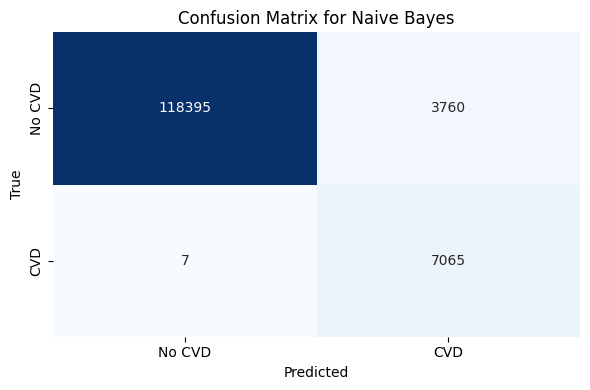

In [5]:
nb = NaiveBayes(var_smoothing=1e-9)
nb.fit(X_train.values, y_train.values)
y_pred_nb = nb.predict(X_test.values)
evaluate_model(y_test, y_pred_nb, "Naive Bayes")

In [6]:

joblib.dump(nb, '_nb.pkl')


['_nb.pkl']